The dataset of employees working in ABC company, it consists of 458 rows and 9 columns. The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1) How many are there in each Team and the percentage splitting with respect to the total employees.
2) Segregate the employees with respect to different positions.
3) Find from which age group most of the employees belong to.
4) Find out under which team and position, spending in terms of salary is high.
5) Find if there is any correlation between age and salary , represent it visually.

Before doing the above questions,perform preprocessing of the dataset. Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the employee data file

In [2]:
df = pd.read_csv("myexcel.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


##### Read the datas from the top and bottom of the table

In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


##### Datatype of each coumn in the dataset

In [5]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
dtype: object

##### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


## Preprocessing the dataset

##### To check if there any null values in the dataset

In [7]:
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


##### Null values in each column

In [8]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

##### Fill NaN with 0

In [9]:
df.fillna(0)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,0,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,0,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,0,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


#### Generate random values for height between 150 and 180

In [10]:
df["Height"] = np.random.randint(150, 180, 458)
df[["Height"]]

,Height
0,171
1,174
2,152
3,168
4,162
...,...
453,161
454,175
455,156
456,158


In [11]:
df[["Name", "Height",]]

,Name,Height
0,Avery Bradley,171
1,Jae Crowder,174
2,John Holland,152
3,R.J. Hunter,168
4,Jonas Jerebko,162
...,...,...
453,Shelvin Mack,161
454,Raul Neto,175
455,Tibor Pleiss,156
456,Jeff Withey,158


### 1) How many are there in each Team and the percentage splitting with respect to the total employees.

#### Number of employees in each team

In [12]:

employee_in_team = df["Team"].value_counts()

print(f"The number of employee in Each team :  {employee_in_team}")


The number of employee in Each team :  Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64


#### Percentage of employees with respect to total employees

In [13]:

employee_percentage = (employee_in_team / 458) * 100

print("The percentage of splitting : ", employee_percentage)


The percentage of splitting :  Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks   

##### Load the column names from dataset

In [14]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

### 2) Segregate the employees w.r.t different positions.

In [15]:
# Employees in Each Positions

df["Position"].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [16]:
# Group employees in each position

positions = df["Position"].unique()

for position in positions:
    print(f"{position} position Employee : ")
    print(df.loc[df['Position'] == position, 'Name' ],"\n")
    print()

PG position Employee : 
0      Avery Bradley
8       Terry Rozier
9       Marcus Smart
11     Isaiah Thomas
19      Jarrett Jack
           ...      
440    Brian Roberts
443       Trey Burke
445       Dante Exum
453     Shelvin Mack
454        Raul Neto
Name: Name, Length: 92, dtype: object 


SF position Employee : 
1                 Jae Crowder
32     Thanasis Antetokounmpo
33            Carmelo Anthony
35           Cleanthony Early
42               Lance Thomas
                ...          
428           Al-Farouq Aminu
432          Maurice Harkless
448            Gordon Hayward
450                Joe Ingles
451             Chris Johnson
Name: Name, Length: 85, dtype: object 


SG position Employee : 
2          John Holland
3           R.J. Hunter
12          Evan Turner
13          James Young
15     Bojan Bogdanovic
             ...       
433    Gerald Henderson
437       C.J. McCollum
438        Luis Montero
444          Alec Burks
449         Rodney Hood
Name: Name, Length: 1

### 3) Find from which age group most of the employees belong to.

In [17]:
# Number of emloyees in each age group
age = df["Age"].value_counts()

print(age)

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64


In [18]:
# Display the count of employees in age group

df['Age Group'] = pd.cut(df['Age'], bins = [15, 20, 25, 30, 35, 40])
age_count = df['Age Group'].value_counts()
print(age_count)

# Display the employee age with maximum count

print(f"\nThe most of the employees are belong to the age group of : ", age_count.idxmax())


Age Group
(20, 25]    179
(25, 30]    167
(30, 35]     68
(35, 40]     23
(15, 20]     21
Name: count, dtype: int64

The most of the employees are belong to the age group of :  (20, 25]


### 4) Find out under which team and position, spending in terms of salary is high.

In [19]:

high = df[["Team", "Position", "Salary"]].sort_values(by = "Salary", ascending = False)

high

,Team,Position,Salary
109,Los Angeles Lakers,SF,25000000.0
169,Cleveland Cavaliers,SF,22970500.0
33,New York Knicks,SF,22875000.0
251,Houston Rockets,C,22359364.0
339,Miami Heat,PF,22192730.0
...,...,...,...
273,Memphis Grizzlies,PF,NaN
350,Miami Heat,PG,NaN
353,Miami Heat,SF,NaN
397,Denver Nuggets,SG,NaN


In [20]:

df.loc[df['Salary'] == df['Salary'].max(), ['Team', 'Position', 'Salary']]


,Team,Position,Salary
109,Los Angeles Lakers,SF,25000000.0


### 5) Find if there is any correlation between age and salary , represent it visually.

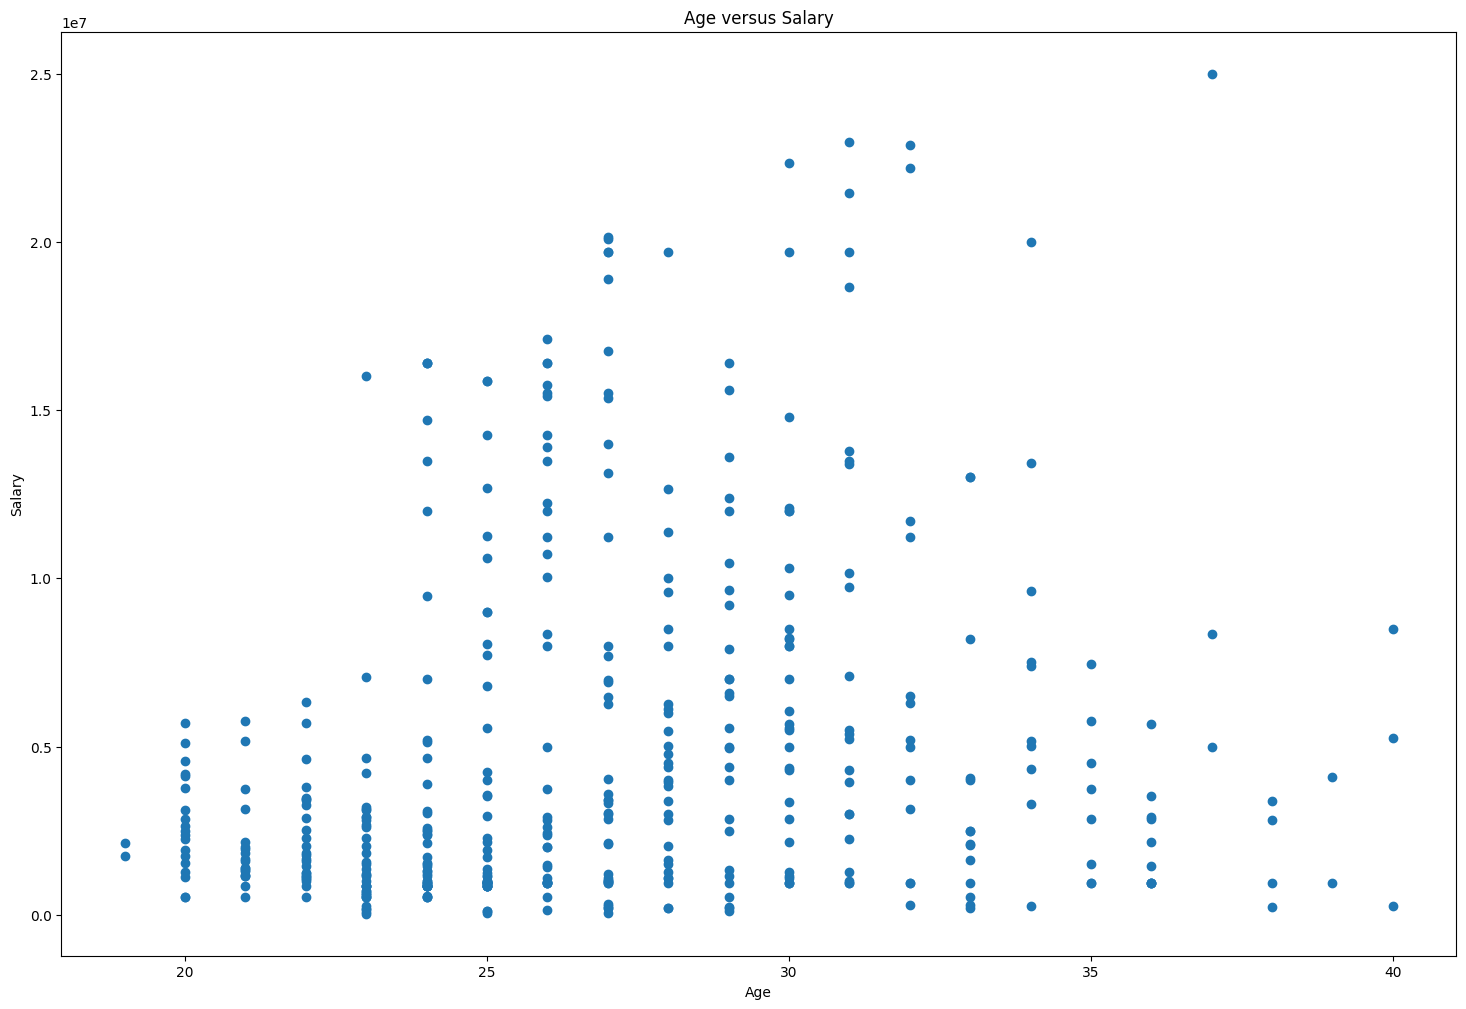

In [21]:

plt.figure(figsize=(18,12))

plt.scatter(df["Age"],df["Salary"])

plt.title("Age versus Salary")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()